In [1]:
import pandas as pd
from ast import literal_eval
import random
import numpy as np

# read data from synth
df_orders = pd.read_json('synth_output_data/orders.json')
df_products = pd.read_json('synth_output_data/products.json')
df_partners = pd.read_json('synth_output_data/partners.json')
df_users = pd.read_json('synth_output_data/users.json')
df_support_requests= pd.read_json('synth_output_data/support_requests.json')
df_orders_random = pd.read_json('synth_output_data/orders_random.json')
df_support_requests_random = pd.read_json('synth_output_data/support_requests_random.json')

# merge orders with users
df_orders_users = pd.merge(df_orders, df_users, on="user_id", how="left")

# remove orders created by users before they existed
df_orders_users_cut = df_orders_users.loc[df_orders_users['created_date']<df_orders_users['timestamp']]

# bulk up orders with more random orders to make up for lost orders in previous step
df_orders_random_users = pd.merge(df_orders_random, df_users, on="user_id", how="left")
df_orders_concat = pd.concat([df_orders_users_cut, df_orders_random_users], axis=0)
df_orders_concat = df_orders_concat.drop(['order_id'], axis=1)
df_orders_concat = df_orders_concat.reset_index(drop=True)
df_orders_concat = df_orders_concat.reset_index()
df_orders_concat = df_orders_concat.rename({'index': 'order_id'}, axis=1)
df_orders_concat['order_id'] = df_orders_concat['order_id']+1

# again, remove orders created by users before they existed and also before 2022-06-01
df_orders_concat_cut = df_orders_concat.loc[df_orders_concat['created_date']<df_orders_concat['timestamp']]
df_orders_concat_cut = df_orders_concat_cut.loc[df_orders_concat_cut['timestamp']<'2022-06-01']
df_orders_concat_cut = df_orders_concat_cut.sort_values('timestamp')
df_orders_concat_cut = df_orders_concat_cut.drop('order_id', axis=1)
df_orders_concat_cut = df_orders_concat_cut.reset_index(drop=True)
df_orders_concat_cut = df_orders_concat_cut.reset_index()
df_orders_concat_cut = df_orders_concat_cut.rename({'index': 'order_id'}, axis=1)
df_orders_concat_cut['order_id'] = df_orders_concat_cut['order_id']+1

df_orders = df_orders_concat_cut.copy()

In [2]:
df_orders.sample(5)

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
311,312,USD,"[5, 34, 25, 28, 2, 40]",4,instagram,2022-04-24 10:56:11,64,edge,2022-01-10 13:13:46,watson_non@hotmail.com,"{'city': 'East Oleta Kulas side', 'country': '..."
257,258,USD,"[11, 3, 7, 7, 25]",1,ppc,2022-04-17 10:23:44,93,chrome,2022-01-14 14:50:26,daphney_rerum@gmail.com,"{'city': 'Ratke view', 'country': 'VU', 'stree..."
466,467,USD,"[40, 5, 39, 37, 1]",2,ppc,2022-05-02 11:25:22,471,chrome,2022-03-13 04:40:48,fannie_dolorum@yahoo.com,"{'city': 'Waelchi mouth', 'country': 'AZ', 'st..."
336,337,USD,"[5, 36, 36, 21, 3]",4,ppc,2022-04-26 15:23:22,100,edge,2022-01-15 13:28:58,hector_magni@yahoo.com,"{'city': 'Cassin haven', 'country': 'MY', 'str..."
99,100,USD,"[12, 38, 3]",4,ppc,2022-02-01 18:39:49,79,chrome,2022-01-13 00:33:34,vivian_numquam@hotmail.com,"{'city': 'Schmitt ville', 'country': 'AO', 'st..."


<AxesSubplot:>

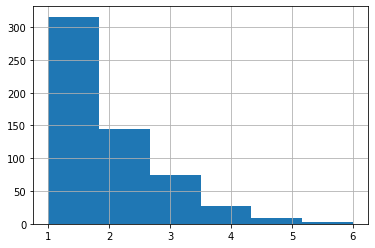

In [3]:
df_orders['user_id'].value_counts().hist(bins=6)

<AxesSubplot:>

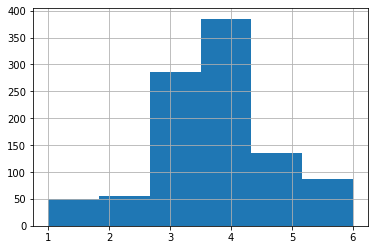

In [4]:
df_orders['partner_id'].hist(bins=6)

In [5]:
df_orders['referrer'].value_counts()

instagram    308
ppc          248
facebook     214
organic      123
direct        76
twitter       31
Name: referrer, dtype: int64

In [6]:
df_orders['ordered_product_skus']

0                      [5, 27]
1                      [31, 9]
2              [28, 32, 7, 40]
3              [33, 15, 37, 3]
4                         [17]
                ...           
995     [39, 25, 3, 33, 5, 20]
996               [27, 20, 19]
997    [30, 1, 14, 20, 24, 26]
998        [2, 11, 40, 33, 17]
999             [3, 13, 6, 26]
Name: ordered_product_skus, Length: 1000, dtype: object

In [7]:
# make some products more popular than others

def product_manipulation(x):
    if i in x:
        if random.randint(0, 10) > 2:
            if len(x) > 1:
                x.remove(i)
    return x

for i in range(1, 43):
    if random.randint(0, 10) > 3:
        print(f'unpopular product: {i}')
        df_orders['ordered_product_skus'] = df_orders['ordered_product_skus'].apply(lambda x: product_manipulation(x))

unpopular product: 3
unpopular product: 4
unpopular product: 5
unpopular product: 8
unpopular product: 9
unpopular product: 10
unpopular product: 11
unpopular product: 12
unpopular product: 13
unpopular product: 14
unpopular product: 15
unpopular product: 16
unpopular product: 17
unpopular product: 18
unpopular product: 19
unpopular product: 20
unpopular product: 22
unpopular product: 23
unpopular product: 24
unpopular product: 25
unpopular product: 27
unpopular product: 28
unpopular product: 30
unpopular product: 34
unpopular product: 35
unpopular product: 37
unpopular product: 38
unpopular product: 42


In [8]:
df_orders

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
0,1,USD,[27],3,ppc,2022-01-03 08:23:34,10,safari,2022-01-02 23:18:24,shannon_consequuntur@yahoo.com,"{'city': 'Klein port', 'country': 'NO', 'stree..."
1,2,USD,[31],1,facebook,2022-01-05 08:22:10,13,safari,2022-01-03 08:13:21,casper_corporis@hotmail.com,"{'city': 'Rhea haven', 'country': 'PT', 'stree..."
2,3,USD,"[28, 32, 7, 40]",4,ppc,2022-01-09 22:17:32,24,chrome,2022-01-04 21:10:59,thaddeus_eius@hotmail.com,"{'city': 'Vandervort bury', 'country': 'JO', '..."
3,4,USD,"[33, 15, 3]",3,instagram,2022-01-09 23:32:02,25,edge,2022-01-05 02:27:25,valentina_sit@yahoo.com,"{'city': 'McLaughlin mouth', 'country': 'FM', ..."
4,5,USD,[17],4,ppc,2022-01-10 10:52:09,18,edge,2022-01-03 18:59:06,ed_quas@gmail.com,"{'city': 'Gia land', 'country': 'MR', 'street_..."
...,...,...,...,...,...,...,...,...,...,...,...
995,996,USD,"[39, 33, 5, 20]",6,facebook,2022-05-30 09:52:13,100,edge,2022-01-15 13:28:58,hector_magni@yahoo.com,"{'city': 'Cassin haven', 'country': 'MY', 'str..."
996,997,USD,[20],3,instagram,2022-05-30 17:17:13,333,internet_explorer,2022-02-21 14:42:22,deondre_libero@hotmail.com,"{'city': 'Regan chester', 'country': 'MQ', 'st..."
997,998,USD,"[30, 1, 24, 26]",3,facebook,2022-05-31 08:00:34,979,safari,2022-05-27 19:48:10,javon_quia@yahoo.com,"{'city': 'Bayer haven', 'country': 'BI', 'stre..."
998,999,USD,"[2, 40, 33]",4,facebook,2022-05-31 14:30:22,583,netscape,2022-03-29 07:18:34,reagan_corporis@gmail.com,"{'city': 'Bednar mouth', 'country': 'SG', 'str..."


In [9]:
df_orders['ordered_product_skus'].value_counts()

[6]             21
[7]             21
[40]            17
[39]            17
[31]            16
                ..
[33, 23, 9]      1
[37, 6, 29]      1
[21, 34, 13]     1
[21, 29, 40]     1
[2, 40, 33]      1
Name: ordered_product_skus, Length: 551, dtype: int64

In [10]:
# drop unnecesary cols
to_drop = [
    'browser',
    'created_date',
    'email',
    'shipping_address',
]
df_orders.drop(to_drop, inplace=True, axis=1)

# generate basket df by exploding orders on skus
df_baskets = df_orders.explode('ordered_product_skus')[['order_id', 'ordered_product_skus']]
df_baskets.reset_index(inplace=True, drop=True)
df_baskets.reset_index(inplace=True)
df_baskets = df_baskets.rename({'index': 'basket_item_id'}, axis=1)
df_baskets['basket_item_id']+=1

# merge baskets with product data
df_baskets = df_baskets.merge(
    df_products,
    left_on='ordered_product_skus',
    right_on='sku',
    how='left'
)
df_baskets = df_baskets.drop(columns=['price_currency', 'product_name', 'sku'], axis=1)

# calculate basket totals and merge back into baskets
df_baskets_totals = df_baskets.groupby('order_id').sum('price_amount')
df_baskets_totals.reset_index(inplace=True)
df_baskets_totals.drop(columns=['basket_item_id'], axis=1, inplace=True)
df_baskets_totals.rename({'price_amount': 'basket_total'}, inplace=True, axis=1)
df_baskets = df_baskets.merge(df_baskets_totals, on='order_id', how='left')

# create basket totals lookup and drop unncessary cols
df_order_basket_totals = df_baskets.drop_duplicates('order_id', keep='first')
to_drop = [
    'basket_item_id',
    'ordered_product_skus',
    'price_amount',
]
df_order_basket_totals = df_order_basket_totals.drop(columns=to_drop, axis=1)
df_order_basket_totals.reset_index(drop=True, inplace=True)

# merge basket totals back to orders
df_orders = df_orders.merge(df_order_basket_totals, how='left', on='order_id')

In [11]:
df_partners

,partner_commission,partner_id,partner_name
0,0.18,1,Plant Paradise
1,0.14,2,Garden of Sweden
2,0.06,3,"Peat, Fruits and Leaves"
3,0.22,4,Redwood Ranch
4,0.08,5,Trowels R Us
5,0.14,6,Glorious Gardens


In [12]:
df_orders = df_orders.merge(df_partners, on='partner_id', how='left')

In [13]:
df_orders['profit'] = df_orders['basket_total'] * df_orders['partner_commission']

In [14]:
df_orders.drop(columns=['partner_name', 'partner_commission'], axis=1, inplace=True)

In [15]:
df_orders

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,basket_total,profit
0,1,USD,[27],3,ppc,2022-01-03 08:23:34,10,65,3.90
1,2,USD,[31],1,facebook,2022-01-05 08:22:10,13,25,4.50
2,3,USD,"[28, 32, 7, 40]",4,ppc,2022-01-09 22:17:32,24,309,67.98
3,4,USD,"[33, 15, 3]",3,instagram,2022-01-09 23:32:02,25,230,13.80
4,5,USD,[17],4,ppc,2022-01-10 10:52:09,18,3,0.66
...,...,...,...,...,...,...,...,...,...
995,996,USD,"[39, 33, 5, 20]",6,facebook,2022-05-30 09:52:13,100,102,14.28
996,997,USD,[20],3,instagram,2022-05-30 17:17:13,333,17,1.02
997,998,USD,"[30, 1, 24, 26]",3,facebook,2022-05-31 08:00:34,979,480,28.80
998,999,USD,"[2, 40, 33]",4,facebook,2022-05-31 14:30:22,583,294,64.68


In [16]:
df_orders.to_csv('transformed_data/orders.csv', index=False)

In [17]:
df_baskets

,basket_item_id,order_id,ordered_product_skus,price_amount,basket_total
0,1,1,27,65,65
1,2,2,31,25,25
2,3,3,28,75,309
3,4,3,32,115,309
4,5,3,7,95,309
...,...,...,...,...,...
1985,1986,999,2,250,294
1986,1987,999,40,24,294
1987,1988,999,33,20,294
1988,1989,1000,6,5,155


In [18]:
df_baskets.to_csv('transformed_data/baskets.csv', index=False)

<AxesSubplot:>

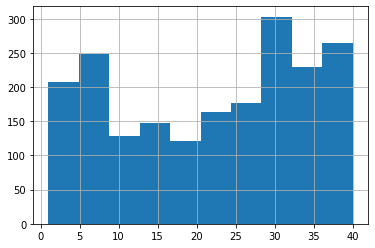

In [19]:
df_baskets['ordered_product_skus'].hist()

In [20]:
df_baskets

,basket_item_id,order_id,ordered_product_skus,price_amount,basket_total
0,1,1,27,65,65
1,2,2,31,25,25
2,3,3,28,75,309
3,4,3,32,115,309
4,5,3,7,95,309
...,...,...,...,...,...
1985,1986,999,2,250,294
1986,1987,999,40,24,294
1987,1988,999,33,20,294
1988,1989,1000,6,5,155


In [21]:
df_baskets[['order_id', 'ordered_product_skus']].groupby('order_id').agg('count')

,ordered_product_skus
order_id,
1,1
2,1
3,4
4,3
5,1
...,...
996,4
997,1
998,4


In [22]:
df_products.sample(10)

,price_amount,price_currency,product_name,sku
12,4,USD,Red Roses seeds,13
40,34,USD,Calathea,41
1,250,USD,Wood-fired pizza oven,2
2,130,USD,Funky gnome themed parasol,3
8,60,USD,Contemporary clay trough,9
35,30,USD,Peace lily,36
27,75,USD,Fig tree,28
33,20,USD,Peony,34
17,3,USD,Oregano seeds,18
26,65,USD,Ficus,27


In [23]:
df_products.to_csv('transformed_data/products.csv', index=False)

In [24]:
df_partners

,partner_commission,partner_id,partner_name
0,0.18,1,Plant Paradise
1,0.14,2,Garden of Sweden
2,0.06,3,"Peat, Fruits and Leaves"
3,0.22,4,Redwood Ranch
4,0.08,5,Trowels R Us
5,0.14,6,Glorious Gardens


In [25]:
df_partners.to_csv('transformed_data/partners.csv', index=False)

In [26]:
df_users.sample(10)

,browser,created_date,email,shipping_address,user_id
442,safari,2022-03-09 21:11:04,frances_repudiandae@gmail.com,"{'city': 'Orn shire', 'country': 'MP', 'street...",443
916,safari,2022-05-19 01:49:12,ruby_perspiciatis@hotmail.com,"{'city': 'Kieran town', 'country': 'AU', 'stre...",917
764,chrome,2022-04-25 05:15:14,kenton_dicta@yahoo.com,"{'city': 'North Lisette Predovic town', 'count...",765
753,chrome,2022-04-23 09:14:15,lilly_molestiae@gmail.com,"{'city': 'Rath port', 'country': 'CV', 'street...",754
995,chrome,2022-05-30 04:39:26,berenice_occaecati@hotmail.com,"{'city': 'Rosenbaum fort', 'country': 'PY', 's...",996
415,safari,2022-03-06 05:07:41,clark_odit@hotmail.com,"{'city': 'Tillman stad', 'country': 'VI', 'str...",416
595,chrome,2022-03-30 15:11:08,josie_voluptatem@hotmail.com,"{'city': 'Schneider land', 'country': 'VG', 's...",596
939,safari,2022-05-22 09:26:18,natalia_velit@hotmail.com,"{'city': 'Hahn mouth', 'country': 'LC', 'stree...",940
107,edge,2022-01-17 01:48:37,nickolas_quis@gmail.com,"{'city': 'Predovic borough', 'country': 'LV', ...",108
319,safari,2022-02-19 13:35:32,mohammad_molestias@hotmail.com,"{'city': 'Lockman stad', 'country': 'RU', 'str...",320


In [27]:
df_users['browser'].value_counts()

chrome               501
safari               243
edge                 179
firefox               41
internet_explorer     20
netscape              14
lynx                   2
Name: browser, dtype: int64

In [28]:
df_users.to_csv('transformed_data/users.csv', index=False)

In [29]:
df_support_requests

,feedback_rating,order_id,reason,request_id,timestamp
0,7,786,Delivery issue,1,2022-01-01 10:04:17
1,8,952,Delivery issue,2,2022-01-02 09:02:11
2,8,89,Payment issue,3,2022-01-03 05:09:22
3,10,751,Payment issue,4,2022-01-03 23:22:36
4,7,708,Wrong item received,5,2022-01-04 20:27:06
...,...,...,...,...,...
125,9,718,Delivery issue,126,2022-05-26 04:29:26
126,9,278,Delivery issue,127,2022-05-27 14:34:41
127,7,145,Product related query,128,2022-05-29 09:59:23
128,10,413,Product related query,129,2022-05-30 01:33:46


In [30]:
# merge requests with orders
df_orders_support_requests = pd.merge(df_support_requests, df_orders_concat_cut, how='left', on='order_id')

# remove requests that happened before their corresponding order
df_orders_support_requests = df_orders_support_requests.loc[df_orders_support_requests['timestamp_x']>df_orders_support_requests['timestamp_y']]
df_orders_support_requests.rename({'timestamp_x': 'timestamp'}, axis=1, inplace=True)

# remove unnecessary cols
to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id'
]
df_orders_support_requests.drop(to_drop, inplace=True, axis=1)

# add on more random requests to bulk out after previous filtering
df_orders_support_requests_concat = pd.concat([df_orders_support_requests, df_support_requests_random])

In [31]:
df_orders_support_requests_concat.columns

Index(['feedback_rating', 'order_id', 'reason', 'request_id', 'timestamp',
       'browser', 'created_date', 'email', 'shipping_address'],
      dtype='object')

In [32]:
# remove order cols again
to_drop = [
    'browser',
    'created_date',
    'email',
    'shipping_address',
]

df_orders_support_requests_concat = df_orders_support_requests_concat.drop(columns=to_drop, axis=1)

In [33]:
# again, merge with orders
df_orders_support_requests_concat_merge = pd.merge(df_orders_support_requests_concat, df_orders_concat_cut, how='left', on='order_id')

# again, remove requests that happened before their corresponding order
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge.loc[df_orders_support_requests_concat_merge['timestamp_x']>df_orders_support_requests_concat_merge['timestamp_y']]
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge_cut.rename({'timestamp_x': 'timestamp'}, axis=1)

In [34]:
list(df_orders_support_requests_concat_merge_cut)

['feedback_rating',
 'order_id',
 'reason',
 'request_id',
 'timestamp',
 'currency',
 'ordered_product_skus',
 'partner_id',
 'referrer',
 'timestamp_y',
 'user_id',
 'browser',
 'created_date',
 'email',
 'shipping_address']

In [35]:
# drop unnecessary cols and reset index
to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id',
    'browser',
    'created_date',
    'email',
    'shipping_address'
]
df_orders_support_requests_concat_merge_cut.drop(to_drop, inplace=True, axis=1)
df_orders_support_requests_concat_merge_cut.reset_index(drop=True, inplace=True)
df_support_requests = df_orders_support_requests_concat_merge_cut.copy()

<AxesSubplot:>

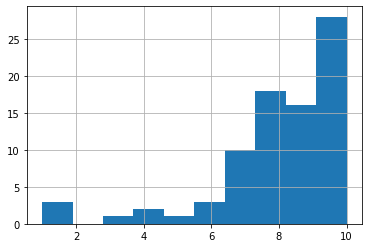

In [36]:
df_support_requests['feedback_rating'].hist()

In [37]:
df_support_requests['reason'].value_counts()

Delivery issue           37
Product related query    25
Wrong item received      11
Payment issue             9
Name: reason, dtype: int64

In [38]:
df_support_requests['order_id'].value_counts()

31     2
7      2
95     2
79     2
50     1
      ..
702    1
552    1
110    1
342    1
178    1
Name: order_id, Length: 78, dtype: int64

In [39]:
df_support_requests.to_csv('transformed_data/support_requests.csv', index=False)

In [40]:
list(df_baskets)

['basket_item_id',
 'order_id',
 'ordered_product_skus',
 'price_amount',
 'basket_total']

In [41]:
list(df_orders)

['order_id',
 'currency',
 'ordered_product_skus',
 'partner_id',
 'referrer',
 'timestamp',
 'user_id',
 'basket_total',
 'profit']

In [42]:
list(df_products)

['price_amount', 'price_currency', 'product_name', 'sku']

In [43]:
list(df_partners)

['partner_commission', 'partner_id', 'partner_name']

In [44]:
list(df_support_requests)

['feedback_rating', 'order_id', 'reason', 'request_id', 'timestamp']

In [45]:
list(df_users)

['browser', 'created_date', 'email', 'shipping_address', 'user_id']